### <p style="text-align: right;"> Alexis Guevara

# Modified Equation Technique and Upwind Finite-Difference Method for Linear Hyperbolic Systems

## Preliminary

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Modified Equation Technique

Consider the finite difference method:

\begin{equation}
    u_j^{n+1} = u_{j}^n - \Delta t \frac{u_{j+1}^n - u_{j-1}^n}{2h} + \Delta t^2 \frac{u_{j+1}^n - 2u_j^n + u_{j-1}^n}{2h^2}
\end{equation}

From the computation of the local truncation error:

\begin{equation}
    \partial_t u(x,t) + \partial_x u(x,t) + \left( \frac{h^2}{6} \partial_x^3 u(x,t) - \frac{h^2 \Delta t}{24} \partial_x^4 u(x,t) \right) + \ldots = 0 
\end{equation}

Truncating the series leads to:

\begin{equation}
    \partial_t u(x,t) + \partial_x u(x,t) + \frac{h^2}{6} \partial_x^3 u(x,t) = 0 
\end{equation}

Using Fourier analysis:

\begin{equation}
    \begin{aligned}
        u(x,t) =&\,\, \frac{1}{2 \pi} \int_{-\infty}^{\infty} \hat{u}(\xi , t) e^{i \xi x} d\xi \\ 
        \partial_x u(x,t) =&\,\, \frac{1}{2 \pi} \int_{-\infty}^{\infty} (i \xi) \hat{u}(\xi , t) e^{i \xi x} d\xi \\ 
        \partial_x^{3} u(x,t) =&\,\, \frac{1}{2 \pi} \int_{-\infty}^{\infty} (-i \xi^{3}) \hat{u}(\xi , t) e^{i \xi x} d\xi \\ 
        \partial_t u(x,t) =&\,\, \frac{1}{2 \pi} \int_{-\infty}^{\infty} \partial_{t}\hat{u}(\xi , t) e^{i \xi x} d\xi \\ 
    \end{aligned}
\end{equation}

So, the Fourier transform of the modified equation is as follows:

\begin{equation}
    \begin{aligned}
        \int_{-\infty}^{\infty} \left( \partial_t u(x,t) + \partial_x u(x,t) + \frac{h^2}{6} \partial_x^3 u(x,t) \right) e^{i \xi x} dx = 0 \\
        \partial_t \hat{u}(x,t) + (i \xi) \hat{u}(x,t) - \frac{h^2 i \xi^{3}}{6} \hat{u}(x,t) = 0 \\
        \partial_t \hat{u}(x,t) = - i \xi \hat{u}(x,t) + \frac{h^2 i \xi^{3}}{6} \hat{u}(x,t) \\
        \partial_t \hat{u}(x,t) = \left( -i \xi + \frac{h^2 i \xi^{3}}{6} \right) \hat{u}(x,t) 
    \end{aligned}
\end{equation}

We now have a time-dependent ODE.
We have to solve an ODE for each value of $\xi$.

Consider the initial data $u(x,0) = g(x)$.
So 

\begin{equation}
    \hat{u} (\xi,0) = \hat{g} (\xi) = \int_{-\infty}^{\infty} g(x) e^{i \xi x} dx
\end{equation}

and the solution of the ODE is 

\begin{equation}
    \begin{aligned}
        \hat{u} (\xi,t) = \hat{g} (\xi) e^{\left(-i \xi + \frac{h^2}{6} i \xi^{3}\right) t} \\
        \hat{u} (\xi,t) = \hat{g} (\xi) e^{ -i \xi \left(1 + \frac{h^2}{6} \xi^{2}\right) t} \\
        u(x,t) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} \hat{g} (\xi) e^{ -i \xi \left(1 + \frac{h^2}{6} \xi^{2}\right) t} e^{i x \xi} d \xi \\
        u(x,t) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} \hat{g} (\xi) e^{i \xi \left(x - \left( 1 + \frac{h^2}{6} \xi^{2}\right) t\right)} d \xi  
    \end{aligned}
\end{equation}

Therefore, each Fourier mode $e^{i \xi x}$ propogates at velocity $1 + \frac{h^2}{6} \xi^{2}$.

The modes for $\frac{h^2}{6} \xi^{2} \neq 0$ propagate at different speeds relative to one another.

Thus, a dispersion occurs within then method where the shape of the initial data will not be preserved.

## An upwind finite-difference method for linear hyperbolic systems

Seek a numerical solution of 

\begin{equation}
       \partial_t \mathbf{u} + A\partial_x \mathbf{u} = 0, 
\end{equation}

in the domain $\Omega = [0,2\pi]$ and a time interval $[0,T]$. Here $A$ is a constant $m\times m$ matrix that is assumed to be diagonalizable. The initial and boundary conditions are 
    
\begin{equation}
    \begin{aligned}
        \mathbf{u}(x,0) =&\,\, \mathbf{g}(x),\\
        \mathbf{u}(0,t) =&\,\, \mathbf{u}(2\pi,t).
    \end{aligned}
\end{equation}

To do so, use an upwind finite-difference method. 

**Task 1**

Create a function `compute_matrice_A_parts` that computes $A^+ = R \Lambda^+ R^{-1}$ and $A^- = R \Lambda^- R^{-1}$. Here $R$ contains the eigenvectors of $A$, $\Lambda^+$ contains the positive eigenvalues of $A$ and $\Lambda^-$ contains the negative eigenvalues of $A$ so that $\Lambda^++\Lambda^-=\Lambda$ and $A^++A^-=A$. The input is the matrix $A$ and the outputs are the matrices $A^-$ and $A^+$. Use a verification test.

In [11]:
def compute_matrice_A_parts(A):
    # Compute eigenvalues and eigenvectors of A
    eigenvalues, R = np.linalg.eig(A)
   
    # Initialize Lambda_plus & Lambda_minus
    Lambda_plus  = np.zeros_like(A)
    Lambda_minus = np.zeros_like(A)
    
    # Create Lambda_plus & Lambda_minus
    for i in range(len(eigenvalues)):
        if eigenvalues[i] > 0:
            Lambda_plus[i,i]  = eigenvalues[i]
        else:
            Lambda_minus[i,i] = eigenvalues[i]

    # Compute A_plus and A_minus
    A_plus  = R @ Lambda_plus @ np.linalg.inv(R)
    A_minus = R @ Lambda_minus @ np.linalg.inv(R)

    return A_plus , A_minus


# Verification Test
A = np.array([[0., 5.], [2., 0.]])
A_plus , A_minus = compute_matrice_A_parts(A)

print("Matrix A:")
print(A)

print("\nMatrix A+")
print(A_plus)

print("\nMatrix A-")
print(A_minus)

print("\nA_plus + A_minus:")
print(A_plus + A_minus)

print("\nA_plus + A_minus = A ?", np.allclose(A, A_plus + A_minus))

Matrix A:
[[0. 5.]
 [2. 0.]]

Matrix A+
[[1.58113883 2.5       ]
 [1.         1.58113883]]

Matrix A-
[[-1.58113883  2.5       ]
 [ 1.         -1.58113883]]

A_plus + A_minus:
[[-4.4408921e-16  5.0000000e+00]
 [ 2.0000000e+00  4.4408921e-16]]

A_plus + A_minus = A ? True


**Task 2**

Create a function `upwind_fd_method` that compute a numerical solution using 

$$\mathbf{u}_j^{n+1} = \mathbf{u}_j^n - \Delta t A^+ \frac{\mathbf{u}_j^n - \mathbf{u}_{j-1}^n}{h} - \Delta tA^- \frac{\mathbf{u}_{j+1}^n-\mathbf{u}_j^n}{h}$$

Here $\Delta t$ is the time-step size and $h$ is the mesh size. The inputs are the mesh size, the time-step size, the endpoints of $\Omega$, the final time $T$, the matrix $A$ and the Python function `initial_cdn` that computes the initial data.  The outputs are a vector containing the $x$ coordinates, the computed final time and the numerical solution at $T$. Observe the **key idea** behind this method.

Consider that you have now a vector containing the values of the different variables at each node instead of a single value. So $\mathbf{u}_j^n$ is a vector containing the $m$ variables at $(x_j,t_n)$. You could define a matrix $\mathbf{u}^n = [\mathbf{u}_0^n, \mathbf{u}_1^n, \dots, \mathbf{u}_{N_x}^n]^T$

In [13]:
def upwind_fd_method(h,delta_t,Omega,T,A,initial_cdn):
    # Compute A_minus and A_plus
    A_minus , A_plus = compute_matrice_A_parts(A)
    
    # Define the x coordinates
    x = np.arange(Omega[0], Omega[1], h+1)
        
    u = np.array([initial_cdn(xi) for xi in x]) # Initialize solution u w/ initial condition
    u_old = np.copy(u)                          # Initialize solution u at previous time step
    
    # Upwind FD Method
    t = 0
    while t < T:
        for j in range(1, len(x)-1):
            u[j] = u_old[j] - delta_t * (A_plus @ ((u_old[j] - u_old[j - 1]) / h)) - delta_t * (A_minus @ ((u_old[j + 1] - u_old[j]) / h)) 
        
        # Boundary condition
        u[-1] = u[0]
        
        u_old = np.copy(u)  # Update solution at previous time step
        t += delta_t        # Update time
    
    # Return x-coordinates , computed final time , and numerical solution at final time
    return x, t, u

The function `upwind_fd_method` applies a forward finite difference method to the negative eigenvalues of A and a backward finite difference method to the positive eigenvalues of A.

The decision ensures that the finite difference is taken in the direction of the characteristic curve when considering the numerical domain of dependence of the PDE. The left side of the domain of dependence is dependent on the positive eigenvalues of matrix A and the right side of the domain of dependence is dependent on the negative eigenvalues of matrix A.

This can further be observed when constructing the stencil when isolating either one of the finite different methods used in the function `upwind_fd_method`. The stencil for the forward finite difference method relies on ${u}_j^{n+1}$ , ${u}_j^{n}$, and ${u}_{j-1}^{n}$. The stencil for the forward finite difference method relies on ${u}_j^{n+1}$ , ${u}_j^{n}$, and ${u}_{j+1}^{n}$.

**Task 3**

Consider 

$$ A = \begin{bmatrix} 0 & -1/8 \\ -1/2 & 0 \end{bmatrix}$$

Perform a convergence plot using the initial condition 

$$\mathbf{g}(x) = \begin{bmatrix} 0 \\ -\cos(x)\end{bmatrix}$$

with $h=2^{-k}$ for $k=1,\dots,8$, and $T=2$. Explain your choice of the time-step size (stability condition). According to your numerical results, what is the order of the method?

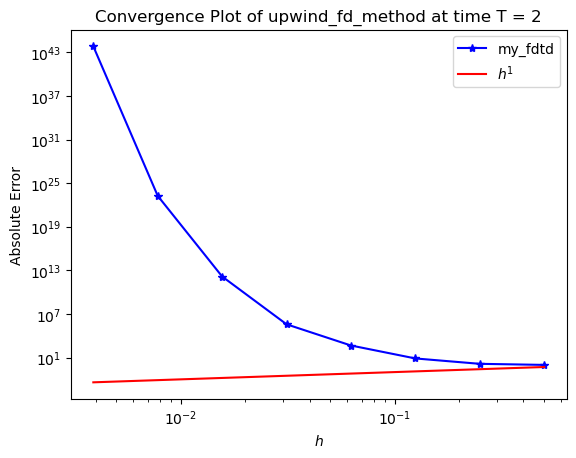

In [16]:
# Initial condition
def initial_cdn(x):
    return np.array([[0], [-np.cos(x)]])

# Define parameters
Omega = [0, 2*np.pi]  # Domain
T = 2                 # Final time
A = np.array([[0, -1/8], [-1/2, 0]])  # Matrix A

# Define k range
k_1 = 1
k_f = 9

# Initialize errors & h values
errors   = np.zeros(k_f-k_1)
h_values = np.zeros(k_f-k_1)

for k in range(k_1, k_f):
    # Mesh size
    h = 2.0**-k
    h_values[k-k_1] = h
    
    # Time-step size
    delta_t = h / np.max(np.abs(np.linalg.eigvals(A))) # Assigned because of stability condition
    
    # Numerical solution 
    x, t, u = upwind_fd_method(h, delta_t, Omega, T, A, initial_cdn)
    
    # Exact solution
    u_exact = np.array([initial_cdn(xi + t * np.max(np.abs(np.linalg.eigvals(A)))) for xi in x])
    
    # Errors
    errors[k-k_1] = np.max(np.abs(u - u_exact))

# Convergence Plot
plt.loglog(h_values, errors, label='my_fdtd',color="blue",marker="*",linestyle="-")
plt.loglog(h_values, h_values**1.00, label="$h^{1}$",color="red",linestyle="-")
plt.legend()
plt.title('Convergence Plot of upwind_fd_method at time T = 2')
plt.xlabel('$h$')
plt.ylabel('Absolute Error')
plt.show()

The choice of the time-step size is dependent on the stability condition of the linear hyperbolic PDE. Since the diagonalizable and constant matrix A is defined with $A^{+}$ and $A^{-}$ in the method, the propagation of the curve is determine by the eigenvalues of the matrix A.

Therefore, the stability condition of the linear hyperbolic PDE is $\frac{\Delta t}{h} = \lambda$ which is derived in the notes. The choice of the stability condition is then assigned to $\Delta t \leq \frac{h}{|\lambda|_{max}}$ , where $\lambda$ is an eigenvalue of A. Within the stability condition, the maximum absolute eigenvalue of A is chosen to ensure that the domain of dependence of the PDE is contained within the numerical domain of dependence.

Although there is an error in the convergence plot for the `upwind_fd_method`, the order of the method is approximately 1.